# Analysis - Absolute Numbers (Race)

### 1. Prepare Workspace

In [12]:
# Import data analysis libraries
import numpy as np
import pandas as pd

# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set appearance parameters
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(style='whitegrid', font_scale=2,
        rc={'axes.facecolor':'white',
            'font.family':'sans-serif',
            'font.sans-serif':['Avenir']})

# Set graph colours
dblue = '#2971b1'
mblue = '#6bacd0'
lblue = '#c2deec'
lired = '#f7ccb4'
mered = '#e48165'
dared = '#ba3132'
palette = [dblue, mblue, lblue, lired, mered, dared]

# Hide extra warnings
import warnings
warnings.filterwarnings(action='once')

# Read in data
df = pd.read_csv('Data - Fatal Police Shootings.csv')

### 2. Conduct Analysis

In [54]:
# Subset data to 2019 and select data of interest
data = df[df['date'].str[:4] == '2019'][['race']]

# Replace blank values with 'Not Reported'
data['race'] = data['race'].fillna('Not Reported')

# Get fatal encounter counts by race
table = pd.DataFrame(data['race'].value_counts())

# Format table
table = table.rename(columns={'race': ''})
races = {'W': 'White', 'B': 'Black', 'H': 'Hispanic',
         'A': 'Asian', 'N': 'Native American', 'O': 'Other'}
table = table.rename(index=races)

# Calculate total
total = len(data)

# Get table of raw values
print('Number of Police Shooting Victims by Race')
print(table)

# Get total
print('\nTotal:', total)

# Get percent of total
print('\nPercent of Total')
print(round(table/total * 100, 2))

Number of Police Shooting Victims by Race
                    
White            403
Black            250
Hispanic         162
Not Reported     143
Asian             19
Native American   13
Other              9

Total: 999

Percent of Total
                      
White            40.34
Black            25.03
Hispanic         16.22
Not Reported     14.31
Asian             1.90
Native American   1.30
Other             0.90


### 3. Create Visualization

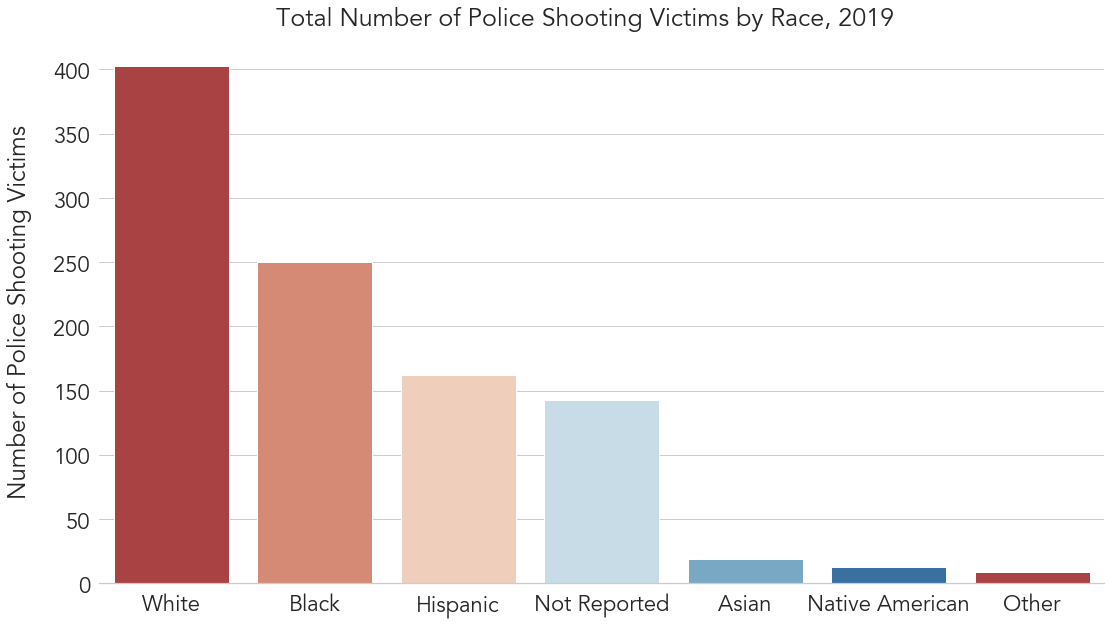

In [23]:
# Select data
data = df[df['date'].str[:4] == '2019'][['race']]

# Replace blank values with 'Not Reported' and add titles for races
data['race'] = data['race'].fillna('Not Reported')
races = {'W': 'White', 'B': 'Black', 'H': 'Hispanic',
         'A': 'Asian', 'N': 'Native American', 'O': 'Other'}
data['race'] = data['race'].replace(races)

# Plot data
plt.figure(figsize=(18, 10))
ax = sns.countplot(x='race', data=data, palette=palette[::-1])

# Create title
title = 'Total Number of Police Shooting Victims by Race, 2019'
plt.figtext(.5,.9, title, fontsize=25, ha='center')

# Format axes
sns.despine(left=True)

# Set graph information
plt.xlabel('', labelpad=20)
plt.ylabel('Number of Police Shooting Victims', labelpad=20)

# Export graphic
#plt.savefig('Total by Race.svg', b_boxinches='tight', transparent=True)

### Appendix

###### Who is in the 'not reported' category?

In [44]:
df[(df['date'].str[:4] == '2019') & (df['race'].isna())].head(20)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
3948,4356,Harold Thompson,2019-01-05,shot,gun,81.0,M,NaN,Union County,SC,False,attack,Not fleeing,False
3953,4358,TK TK,2019-01-06,shot,knife,NaN,M,NaN,Glen Valley,CA,False,other,Not fleeing,False
3954,4359,James McDonald,2019-01-06,shot,gun,NaN,M,NaN,Cache,OK,False,attack,Not fleeing,False
3960,4364,Michael W. Mobley,2019-01-08,shot,gun,53.0,M,NaN,Leadwood,MO,False,attack,Not fleeing,False
3961,4520,Jerald Wilson,2019-01-08,shot and Tasered,beer bottle,33.0,M,NaN,Midland,TX,False,attack,Not fleeing,False
3968,4522,TK TK,2019-01-11,shot and Tasered,ax,NaN,M,NaN,Huntsville,TX,False,other,Not fleeing,False
3974,4403,Keith Harvey,2019-01-13,shot,knife,43.0,M,NaN,Lakewood,WA,True,attack,Not fleeing,False
3976,4371,Rodney Hamilton,2019-01-14,shot,gun,62.0,M,NaN,Gainesville,GA,False,other,Not fleeing,False
4008,4418,Russ Allen McClellan,2019-01-25,shot,gun,48.0,M,NaN,Garland,TX,True,attack,Not fleeing,False
4009,4419,Robert C. Martin,2019-01-25,shot,gun,69.0,M,NaN,North Escambia,FL,True,attack,Not fleeing,False
